In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from cluster_filter import cfilter, cassign

from External.ICT.calculate_ICT import calculate_ICT, calculate_sub_ICTs
from External.clustering import centers, k_means_pp
from External.generation import create_graph
from External.plotting import plot_points, plot_graph, no_intersections
from External.create_k_nearest import patch_together

plt.style.use('standard.mplstyle')

cv2 package not present. No movies possible


In [5]:
# Hyperparameters
mode = "K_Nearest"
metric = "euclidean"
dataset = "non_convex"
ICT_algorithm = "cluster_all"


min_cluster_size = 12
small_behavior = "reassign"

# image loading
n = number_of_nodes = 1000
Random = True
image_name = "image"

# for the filename
parameters = "2-0_5-1000"

In [6]:
def load_image(filename):
    a=plt.imread(filename+'.png')
    rgb_weights = [0.2989, 0.5870, 0.1140]
    
    grayscale_image = np.dot(a[...,:3], rgb_weights)>0
    
    return grayscale_image
    
    
def sample_points_from_image(n,img,Random=True):
    if not Random:
        random.seed(42)
    non_zero = np.where(img!=0)
    # non_zero=np.vstack((non_zero[0],non_zero[1])).T
    
    
    idx = random.sample(range(len(non_zero[0])),n)
    
    x_coord = non_zero[0][idx]
    y_coord = non_zero[1][idx]
    return x_coord,y_coord

In [7]:
# Compute the position array
img = load_image(image_name)
position = np.array(sample_points_from_image(n,img,Random)).T
position = StandardScaler().fit_transform(position)

# Compute knearest graph


# ε, δ = 0.03, 0.1
# r = 1 / (ε**2) * (int(np.log2(number_of_nodes - 1)) + 1 + np.log(1/δ))
# k = int(np.sqrt(r))
# k = np.min((k, number_of_nodes))


k = 4

cluster_centers, cluster_labels = k_means_pp(k, position, return_labels=True)

if small_behavior == "remove":
    cluster_centers, cluster_labels, (position, ) = cfilter(cluster_centers, cluster_labels, t=min_cluster_size, position_likes=[position])
    number_of_nodes = len(position)
if small_behavior == "reassign":
    cluster_centers, cluster_labels = cassign(cluster_centers, cluster_labels, position, t=min_cluster_size)
    
sub_ICTs, components = calculate_sub_ICTs(position, cluster_centers, cluster_labels, t=min_cluster_size)


# plot the ICT forest
ICT_forest = nk.graph.Graph(n=len(position), weighted=True)
distances = pairwise_distances(position, position)
for component, sub_ICT in zip(components, sub_ICTs):
    for u, v, w in sub_ICT.iterEdgesWeights():
        nodeA = component[u]
        nodeB = component[v]
        ICT_forest.addEdge(nodeA, nodeB, distances[nodeA, nodeB])
        
ICT_forest.indexEdges()

sklearn is done: 0.20647978782653809
My own part is done: 0.0013318061828613281


  0%|          | 0/4 [00:00<?, ?it/s]

Final k: 11
None
[]


create edgeId array:   0%|          | 0/1997 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/1997 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/315 [00:00<?, ?it/s]

update Arr 1997 -> 1809
update Arr 1809 -> 1627
update Arr 1627 -> 1476
update Arr 1476 -> 1337
update Arr 1337 -> 1215
update Arr 1215 -> 1101
update Arr 1101 -> 997
update Arr 997 -> 905
update Arr 905 -> 819
update Arr 819 -> 744
update Arr 744 -> 675
update Arr 675 -> 612
update Arr 612 -> 552
update Arr 552 -> 500
update Arr 500 -> 453
update Arr 453 -> 411
update Arr 411 -> 372
update Arr 372 -> 336
update Arr 336 -> 325
update Arr 325 -> 321
update Arr 321 -> 318
update Arr 318 -> 316
update Arr 316 -> 315
Final k: 11
None
[]


create edgeId array:   0%|          | 0/1203 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/1203 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/187 [00:00<?, ?it/s]

update Arr 1203 -> 1091
update Arr 1091 -> 989
update Arr 989 -> 879
update Arr 879 -> 794
update Arr 794 -> 715
update Arr 715 -> 644
update Arr 644 -> 584
update Arr 584 -> 529
update Arr 529 -> 473
update Arr 473 -> 423
update Arr 423 -> 384
update Arr 384 -> 345
update Arr 345 -> 313
update Arr 313 -> 281
update Arr 281 -> 245
update Arr 245 -> 221
update Arr 221 -> 200
update Arr 200 -> 195
update Arr 195 -> 191
update Arr 191 -> 190
update Arr 190 -> 188
update Arr 188 -> 187
Final k: 11
None
[]


create edgeId array:   0%|          | 0/1735 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/1735 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/274 [00:00<?, ?it/s]

update Arr 1735 -> 1571
update Arr 1571 -> 1424
update Arr 1424 -> 1289
update Arr 1289 -> 1161
update Arr 1161 -> 1053
update Arr 1053 -> 953
update Arr 953 -> 862
update Arr 862 -> 779
update Arr 779 -> 708
update Arr 708 -> 638
update Arr 638 -> 574
update Arr 574 -> 521
update Arr 521 -> 468
update Arr 468 -> 425
update Arr 425 -> 383
update Arr 383 -> 346
update Arr 346 -> 313
update Arr 313 -> 284
update Arr 284 -> 280
update Arr 280 -> 277
update Arr 277 -> 275
update Arr 275 -> 274
Final k: 11
None
[]


create edgeId array:   0%|          | 0/1419 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/1419 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/220 [00:00<?, ?it/s]

update Arr 1419 -> 1289
update Arr 1289 -> 1170
update Arr 1170 -> 1063
update Arr 1063 -> 962
update Arr 962 -> 874
update Arr 874 -> 792
update Arr 792 -> 715
update Arr 715 -> 647
update Arr 647 -> 585
update Arr 585 -> 531
update Arr 531 -> 478
update Arr 478 -> 432
update Arr 432 -> 392
update Arr 392 -> 352
update Arr 352 -> 311
update Arr 311 -> 282
update Arr 282 -> 254
update Arr 254 -> 230
update Arr 230 -> 226
update Arr 226 -> 223
update Arr 223 -> 221
update Arr 221 -> 220


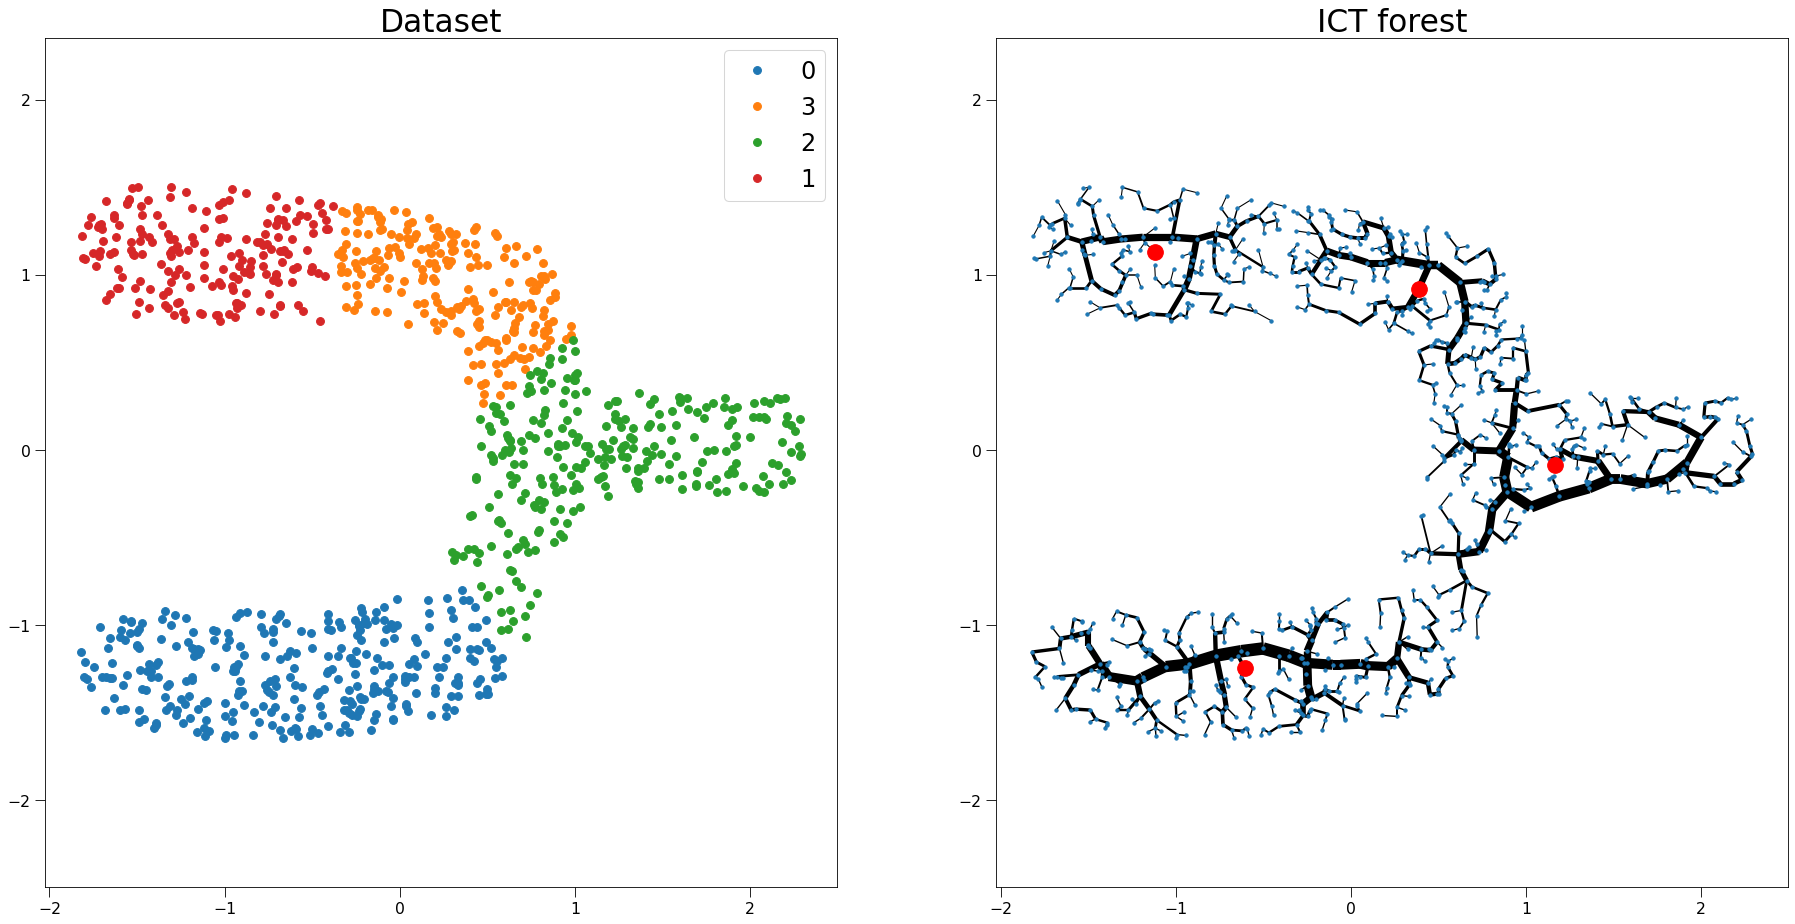

In [8]:
# Plot the prepared data
fig, axs = plt.subplots(1, 2)
plot_points(position, "Dataset", axs[0], labels=np.array(cluster_labels))
plot_graph(ICT_forest, position, "ICT forest", axs[1], cluster_centers)
plt.show()

In [16]:
G = patch_together(ICT_forest, position, bridges=4)

ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers,
                                zeros_stay_zeros=True, update_G=1.1)
ICT.indexEdges()

Patching the components together:   0%|          | 0/4 [00:00<?, ?it/s]

create edgeId array:   0%|          | 0/1008 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/1008 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/999 [00:00<?, ?it/s]

update Arr 1008 -> 1008
added 313 edges early
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1008
update Arr 1008 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1005
update Arr 1005 -> 1004
update Arr 1004 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 -> 1002
update Arr 1002 ->

In [17]:
max_st = nk.graph.RandomMaximumSpanningForest(G)
max_st.run()
max_st = max_st.getMSF(True)
max_st.indexEdges()
G_inv = nk.graph.Graph(n=G.numberOfNodes(), weighted=True)
for u,v,w in G.iterEdgesWeights():
    G_inv.addEdge(u,v,1/w)

min_st = nk.graph.RandomMaximumSpanningForest(G_inv)
min_st.run()
min_st = min_st.getMSF(True)
min_st.indexEdges()

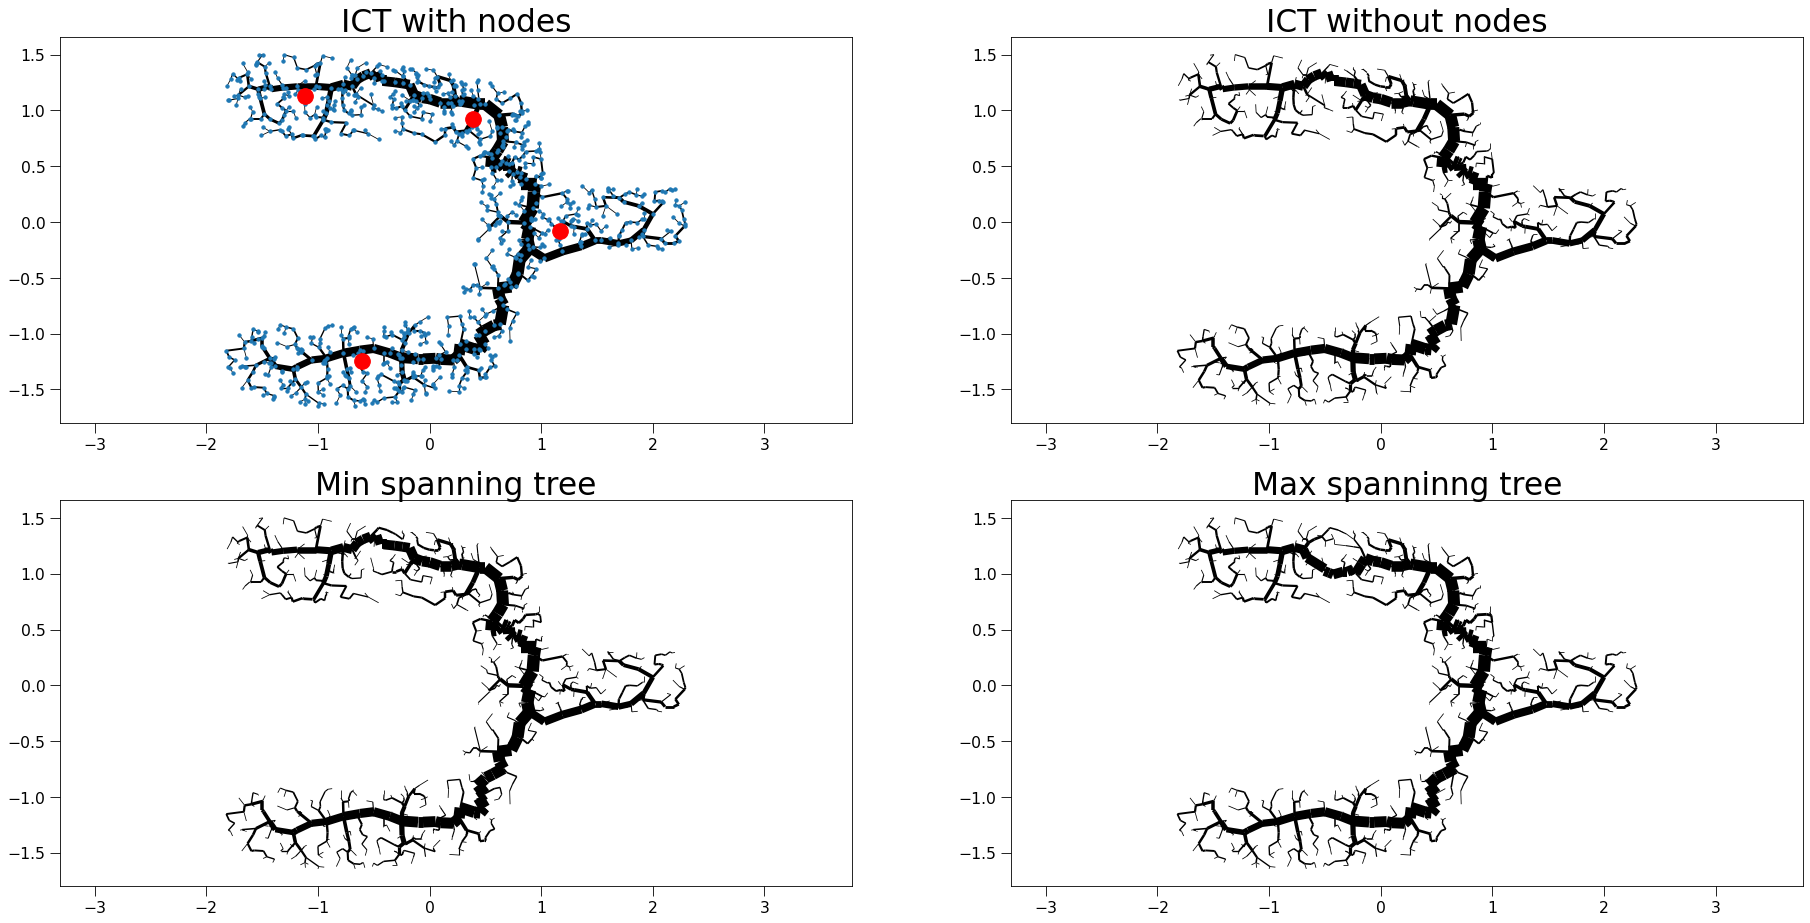

In [18]:
# Plot the ICT
fig, axs = plt.subplots(2, 2)
plot_graph(ICT, position, "ICT with nodes", axs[0,0], cluster_centers)
plot_graph(ICT, position, "ICT without nodes", axs[0,1], node_size=0)
plot_graph(max_st, position, "Max spanninng tree", axs[1,1], node_size=0)
plot_graph(min_st, position, "Min spanning tree", axs[1,0], node_size=0)
# plt.savefig(dataset+"-"+parameters+".png")